# Flow angle calibration

For details on the flow angle calibration, refer to master thesis, Kap. 4.4.
___

Indicated (theoretical) flow angle $\alpha_i$ can be calculated using the following formula:

$\alpha_i = \frac{1}{C_{k}}\tilde{p}$

Where $C_k=0.079\ deg^{-1}$ is a theoretical constant and $\tilde{p}=\frac{\Delta p_{\alpha}}{q_i}$ is the differential pressure, normalized by the indicated dynamic pressure.

To calculate the true (corrected) flow angle $\alpha_c$ the formula has to be extended:

$\alpha_c = \frac{1}{C_{k,\alpha}}\Delta \tilde{p_c} + \alpha_0$

With the modified calibration coefficient $C_{k,\alpha}$ and angle offset value $\alpha_0$.

The calibration of $C_k$ can be done by performing yaw and pitch oscillation maneuvers for the beta and alpha which alters them as much as possible. For the alpha sensor, the airplane should perform harmonic pitching maneuvers by pulling and pushing the pitch control. The beta sensor can be calibrated by harmonic yaw oscillations using the rudder pedals. Both maneuvers have to be done seperately, in a adequately frequency and by keeping the remaining flight parameters (roll angle, airspeed etc.) constant. The offset value $\alpha_0$ can be determined asuming that $\overline{w}=0$ in the duration of a whole flight. Therefore, $\alpha_0$ is kept varying until $\overline{w}=0$. For the determination of $\beta_0$ one has to perform reverse-heading-maneuvers parallel to the wind direction. $\beta_0$ is varied until the absolute windspeed values are equal, which asumes a stationary wind field.

## Determination of $\alpha_0$
___

For this purpose, we can use the several low tracks flown at Demmin. Using data from flights above the PBL are reasonable as well, however, the calibration procedure assumes that $\overline{w}=0$ over the whole flight, which might be not the case if e.g. large/synoptic scale lift is present. Vertical wind speeds have their maximum values in mid tropospheric levels and zero at the ground for this case.

The chosen flights are shown below:

- 14.08.17:
    - flight 1: 11:27:50 - 12:12:30
    - flight 2: 16:37:00 - 16:58:00
- 15.08.17:
    - flight 1: 06:09:10 - 06:32:20
    - flight 2: 08:36:40 - 08:58:03 | 09:08:20 - 09:58:10

In [1]:
import numpy as np
import os
#processing routines
main_dir = '/home/axel/5Loch/python/'
new_conf_dir = '/home/axel/5Loch/processing/configurations/'

#interval

def copy_conf(mn_dir, new_conf_dir, new_conf):
    '''
    Moves a specified configuration file into the python processing directory
    '''
    #copy configuration file into the main python directory (specified above)
    os.system('mv ' + mn_dir + 'conf.py ' + mn_dir + ' conf.py.bak') #backup configuration file
    os.system('cp ' + new_conf_dir + new_conf + ' ' + mn_dir + 'conf.py')
    print('Using configuration file ' + new_conf)
    
    return(None)

def copy_const(mn_dir, new_const_dir, new_const):
    '''
    Moves a specified constant file into the python processing directory
    '''
    os.system('mv ' + mn_dir + 'const.py ' + mn_dir + ' const.py.bak') #backup configuration file
    os.system('cp ' + new_const_dir + new_const + ' ' + mn_dir + 'const.py')
    print('Using constant file ' + new_const)
    
    return(None)

def func_deriv(f,dx=0.01):
    '''
    function derivator (1D)
        
    Input:
        x - float, input value
        
    Output:
        df - function, derived function
    '''
    def df(x):
        '''
        actual function derivation
        '''
        return((f(x + dx) - f(x - dx)) / 2. /dx)
    return(df)

def newton(func,x_range,tries=10,epsilon=0.00001,dx=0.01):
    '''
    Newton iteration function (1D) for retreiving the root
    
    Input:
        func - function, 1D input function
        x_range - list, range of the suspected solution
        tries - int, number of max iterations
        epsilon - float, stop cirterion
        dx - float, discrete derivation step size
        
    Output:
        x_n - float, root of input function within the predefined x-range
    '''
    
    func_p = func_deriv(func)
    x_n = x_range[0] + (x_range[1] - x_range[0]) / 2
    count = 0
    diff = epsilon + 1
    while count < tries and diff >= epsilon:
        x_n_p1 = x_n - func(x_n) / (func_p(x_n) + 1e-32)
        count = count + 1
        diff = abs(x_n_p1 - x_n)
        x_n = x_n_p1
        print('iteration: ' + str(count) + ', parameter: ' + str(x_n))
    if count == tries:
        print('No solution found after ' + str(tries) + ' iterations. Returned None')
        return(None)
    else:
        print('Solution found.')
        return(x_n)
    
def func_maker(f):
    
    def df(x):
        return(f(x))
    
def mean_w(offset):
    
    wind = wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          offset, bet0, C_alp, C_bet, L, r, simple=False)
    
    out = np.mean(wind['w'])
    
    return(out)

for i in np.arange(0,5):
    new_conf = 'conf_alpha_angle_' + str(i) + '.py'
    copy_conf(main_dir, new_conf_dir, new_conf)
    output_dir = os.getcwd()
    os.chdir(main_dir)
    exec(open('main.py').read())
    os.chdir(output_dir)
    

    alp0_best = newton(mean_w,[4,6])
    print(alp0_best)

#guessed values


Using configuration file conf_alpha_angle_0.py
Input directory: /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/python/in/
Loading CPT6100 data...


FileNotFoundError: [Errno 2] No such file or directory: '/home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/python/in/cpt6100_port0_data.txt'

In [ ]:
alp0_range = [5.4,5.5]
fineness = 100
x_m = np.linspace(alp0_range[0],alp0_range[1],fineness)
out_zero = np.zeros(5)
airspeed_mean = np.zeros(5)

for i in np.arange(0,5):
    new_conf = 'conf_alpha_angle_' + str(i) + '.py'
    copy_conf(main_dir, new_conf_dir, new_conf)
    output_dir = os.getcwd()
    os.chdir(main_dir)
    exec(open('main.py').read())
    os.chdir(output_dir)
    #now the configuration is loaded...lets iterate over all x_m's
    out = np.zeros(fineness) #clear working output variable
    for j,var in enumerate(x_m):
        data.update(wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          var, bet0, C_alp, C_bet, L, r, simple=False))
        print(np.mean(data['w']))
        out[j] = np.mean(data['w'])
    print(out)
    out_zero[i] = x_m[np.argmin(np.abs(out))]
    airspeed_mean[i] = np.mean(data['p_spd'])
    print(airspeed_mean)
    print('Found best alp0 value ' + str(out_zero[i]) + ' in run ' + str(i) + '.')

In [6]:
alp0_mean = np.mean(out_zero)
alp0_std = np.std(out_zero)
print('Best value found for alp0=' + str(round(alp0_mean,3)) + '+-' + str(round(alp0_std,3)))

Best value found for alp0=5.47+-0.052


Now we've found our calibration constants for $\alpha$. The Calibration constant $C_{k,\alpha}$ seems rather high (0.1071) and differs partially from the literature values (0.079 to 0.086 for indicated values, 0.101 in Mallaun 2015 after application of static defect correction). A possible reason could be a strong upwash effect just ahead of the wing. This effect is coupled to the circulation around the airfoil, which in turn is proportional to angle of attack. Therefore, $C_{k,\alpha}$ is higher then in the literature for wing mountings, to compensate the dynamic upwash effect which hasn't much effect on noseboom configurations. The relatively high value of $\alpha_0$ results mainly from the (quite visbile) mechanical offset angle between the IMU and 5HP mounting.

There might be an residue uncertainty regarding the flow angle impact on the measured static pressure. Although its partially compensated by the interrelation of angle of attack and dynamic pressure in horizontal, stabilized flight conditions, there might be still a residue for accelerated flight conditions, which are also speed dependend.

In the next step we will retreive the calibration constants for $\beta$.

## Determination of $C_{k,\alpha}$

___

Ok, before we begin to calculate the calibration constant for the beta angle, we've clearly have to adress the static defect, which oscillates with twice the frequency of $\beta$. Before we can correct it using a regression model, we 'generate' measuring points with error bars first. They can be used for the error estimation of the polyfit. Just using the error-covariance matrix doesn't work well with those large amounts of data points, as a result the exstimated parameter errors are way to small.

To do so, we create small 'bins' where we can measure the mean and std of the normalized static pressure. After that, we can do a proper regression with error estimation.

In [64]:
#pitch angle calibration

#first: copy configuration file into python directory and run the main.py
import os

import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

#Processing data

#processing routines
main_dir = '/home/axel/5Loch/python/'

#copy configuration file into the main python directory (specified above)
os.system('mv ' + main_dir + 'conf.py conf.py.bak') #backup configuration file
os.system('cp /home/axel/5Loch/processing/configurations/conf_pitching_maneuver_0.py ' +
          main_dir + 'conf.py')

#copy const file
#os.system('mv ' + main_dir + 'const.py const.py.bak')
#os.system('cp /home/axel/5Loch/processing/constants/const_pitching_maneuver.py ' + 
#         main_dir + 'const.py')

#output directory for plots etc.
output_dir = os.getcwd()

#change to processing directory
os.chdir(main_dir)

#execute to get data
exec(open('main.py').read())

os.chdir(output_dir)

#save old values
old_p_alp = np.array(data['p_alp'])
old_alp = np.array(data['alp']*180/np.pi)
old_w = np.array(data['w'])
old_sigma_w = np.std(data['w'])

Using raw data files in path /home/axel/5Loch/flights/testflights/20170809/testflight_2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2017-08-09 17:08:06' and '2017-08-09 17:09:08' UTC
Done.


In [65]:
#define range in which the C_k value will vary

C_k_range = [0.075, 0.1]
step_size = 300 #fineness

x_m = np.linspace(C_k_range[0],C_k_range[1],step_size)
out = np.zeros(len(x_m))
for i,x in enumerate(x_m):
    C = x
    data.update(wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, C, C_bet, L, r, simple=False))
    out[i] = np.std(data['w'])
    
#minimum found:
alpha_best = x_m[np.argmin(out)]
print('Found best calibration coefficient for C_k_alpha: ' + str(alpha_best))

#now calculate using the new coefficient
data.update(wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, alpha_best, C_bet, L, r, simple=False))
x_m_alpha = x_m
out_alpha = out
sigma_w = np.std(data['w'])

Found best calibration coefficient for C_k_alpha: 0.0884615384615


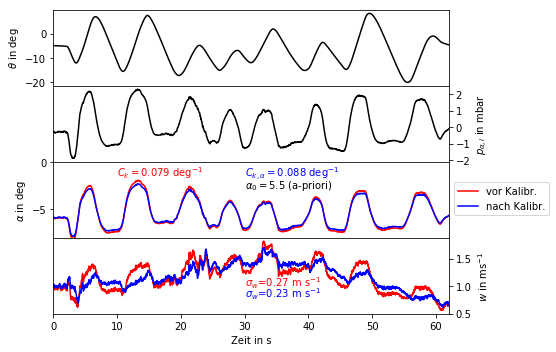

In [66]:
old_col='red'
new_col='blue'

x_data = (data['time'].values-data['time'].values[0])

fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(4,1,1)
ax1.plot(x_data,data['theta']*180/np.pi,color='black')
ax1.set_ylabel(r'$\theta$ in deg')
ax1.set_yticks(np.linspace(-20,0,3))

ax2 = fig.add_subplot(4,1,2)
ax2.plot(x_data,old_p_alp/100,color='black')
ax2.set_ylabel(r'$p_{\alpha,i}$ in mbar')
ax2.set_yticks(np.linspace(-2,2,5))

ax2.tick_params(axis='y', which='both', labelleft='off', labelright='on')
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

ax3 = fig.add_subplot(4,1,3)
ax3.plot(x_data,old_alp,color=old_col,label='vor Kalibr.')
ax3.plot(x_data,data['alp']/np.pi*180,color=new_col,label='nach Kalibr.')
ax3.set_ylim((-8,0))
ax3.set_xlabel(r'Flugzeit in min')
ax3.set_ylabel(r'$\alpha$ in deg')
ax3.text(10,-1.5,r'$C_k=0.079$ deg$^{-1}$',color=old_col)
ax3.text(30,-1.5,r'$C_{k,\alpha}=$' +
         str(round(alpha_best,3)) +  ' deg$^{-1}$',color=new_col)
ax3.text(30,-2.8,r'$\alpha_0=5.5$ (a-priori)',color='black')
lgd1 = ax3.legend(bbox_to_anchor=(1,0.8))
lgd2 = ax3.legend(bbox_to_anchor=(1,0.8))

ax4 = fig.add_subplot(4,1,4)
ax4.plot(x_data,old_w,color=old_col)
ax4.plot(x_data,data['w'],color=new_col)
ax4.set_yticks(np.linspace(0.5,1.5,3))
ax4.set_ylabel(r'$w$ in ms$^{-1}$')
ax4.set_xlabel('Zeit in s')
ax4.text(30,1,r'$\sigma_w$={:.2f}'.format(old_sigma_w) + r' m s$^{-1}$',color='red')
ax4.text(30,0.8,r'$\sigma_w$={:.2f}'.format(sigma_w) + r' m s$^{-1}$',color='blue')

ax4.tick_params(axis='y', which='both', labelleft='off', labelright='on')
ax4.yaxis.set_label_position('right')
ax4.yaxis.set_ticks_position('right')

axes = fig.get_axes()
for i,ax in enumerate(axes):
    ax.margins(x=0)
    if i < 3:
        ax.set_xticks([], [])

fig.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('alpha_osz.pdf',bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')

$\alpha_0=5.47\pm 0.052$

## Determination of $C_{k,\beta}$


In [67]:
#yaw angle calibration

#first: copy configuration file into python directory and run the main.py
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

#Processing data

#processing routines
main_dir = '/home/axel/5Loch/python/'

#copy configuration file into the main python directory (specified above)
os.system('mv ' + main_dir + 'conf.py conf.py.bak') #backup configuration file
os.system('cp /home/axel/5Loch/processing/configurations/conf_yawing_maneuver_0.py ' +
          main_dir + 'conf.py')

#copy const file
#os.system('mv ' + main_dir + 'const.py const.py.bak')
#os.system('cp /home/axel/5Loch/processing/constants/const_yawing_maneuver.py ' + 
#         main_dir + 'const.py')

#output directory for plots etc.
output_dir = os.getcwd()

#change to processing directory
os.chdir(main_dir)

#execute to get data
exec(open('main.py').read())

os.chdir(output_dir)

#save old values
old_p_bet = np.array(data['p_bet'])
old_bet = np.array(data['bet']*180/np.pi)
old_u = np.array(data['u'])
old_v = np.array(data['v'])
old_sigma_u = np.std(data['u'])
old_sigma_v = np.std(data['v'])

Using raw data files in path /home/axel/5Loch/flights/testflights/20170809/testflight_2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2017-08-09 17:07:31' and '2017-08-09 17:07:52' UTC
Done.


In [68]:
#define range in which the C_k value will vary

C_k_range = [0.06, 0.08]
step_size = 300 #fineness

x_m = np.linspace(C_k_range[0],C_k_range[1],step_size)
out = np.zeros(len(x_m))
for i,x in enumerate(x_m):
    C = x
    data.update(wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, C_alp, C, L, r, simple=False))
    out[i] = np.std(data['u'])

#minimum found:
beta_best = x_m[np.argmin(out)]+0.0014224264323914326
print('Found best calibration coefficient for C_k_beta: ' + str(beta_best))

#now calculate using the new coefficient
data.update(wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, C_alp, beta_best, L, r, simple=False))
x_m_beta = x_m+0.0014224264323914326
out_beta = out
cross_angl = np.mean(data['psi']-data['wdir']*np.pi/180) #fixed angle
cross_wind = np.sin(cross_angl) * data['wspd']
sigma_cross = np.std(cross_wind)
sigma_u = np.std(data['u'])
sigma_v = np.std(data['v'])

Found best calibration coefficient for C_k_beta: 0.0703856371347


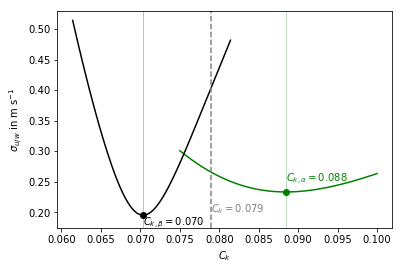

In [69]:
plt.plot(x_m_alpha,out_alpha,color='green')
plt.plot(x_m_beta,out_beta,color='black')
plt.ylabel(r'$\sigma_{u/w}$ in m s$^{-1}$')
plt.scatter(alpha_best,np.min(out_alpha),color='green')
plt.scatter(beta_best,np.min(out_beta),color='black')
plt.axvline(alpha_best,color='green',linewidth=0.5,alpha=0.5)
plt.axvline(beta_best,color='black',linewidth=0.5,alpha=0.5)
plt.axvline(0.079,color='grey',linestyle='--')
plt.text(0.079,0.2,r'$C_k=0.079$',color='grey')
plt.text(alpha_best,0.25,r'$C_{k,\alpha}=$' + '{:.3f}'.format(alpha_best),color='green')
plt.text(beta_best,0.18,r'$C_{k,\beta}=$' + '{:.3f}'.format(beta_best),color='black')
plt.xlabel(r'$C_k$')

plt.savefig('min_C_k.pdf', bbox_inches='tight')

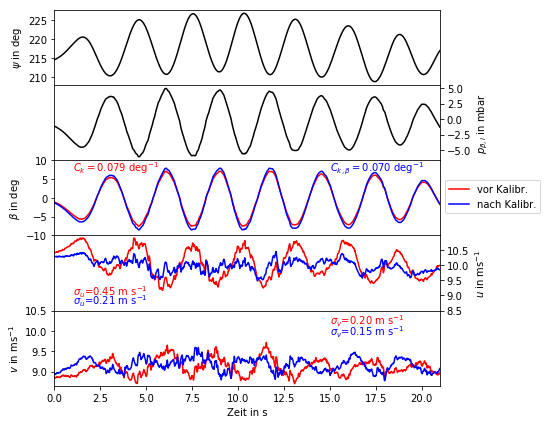

In [70]:
old_col='red'
new_col='blue'

x_data = (data['time'].values-data['time'].values[0])

fig = plt.figure(figsize=(7,6))

sub_plt = 5

ax1 = fig.add_subplot(sub_plt,1,1)
ax1.plot(x_data,data['psi']*180/np.pi,color='black')
ax1.set_ylabel(r'$\psi$ in deg')
ax1.set_yticks(np.linspace(210,225,4))

ax2 = fig.add_subplot(sub_plt,1,2)
ax2.plot(x_data,old_p_bet/100,color='black')
ax2.set_ylabel(r'$p_{\beta,i}$ in mbar')
ax2.set_yticks(np.linspace(-5,5,5))

ax2.tick_params(axis='y', which='both', labelleft='off', labelright='on')
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

ax3 = fig.add_subplot(sub_plt,1,3)
ax3.plot(x_data,old_bet,color=old_col,label='vor Kalibr.')
ax3.plot(x_data,data['bet']/np.pi*180,color=new_col,label='nach Kalibr.')
ax3.set_yticks(np.linspace(-10,10,5))
ax3.set_xlabel(r'Flugzeit in min')
ax3.set_ylabel(r'$\beta$ in deg')
ax3.text(1,7,r'$C_k=0.079$ deg$^{-1}$',color=old_col)
ax3.text(15,7,r'$C_{k,\beta}=$' + '{:.3f}'.format(beta_best) +  ' deg$^{-1}$',color=new_col)
lgd1 = ax3.legend(bbox_to_anchor=(1,0.8))
lgd2 = ax3.legend(bbox_to_anchor=(1,0.8))

ax4 = fig.add_subplot(sub_plt,1,4)
ax4.plot(x_data,old_u,color=old_col)
ax4.plot(x_data,data['u'],color=new_col)
ax4.set_yticks(np.linspace(8.5,10.5,5))
ax4.set_ylabel(r'$u$ in ms$^{-1}$')
ax4.set_xlabel('Zeit in s')
ax4.text(1,9,r'$\sigma_u$={:.2f}'.format(old_sigma_u) + r' m s$^{-1}$',color='red')
ax4.text(1,8.7,r'$\sigma_u$={:.2f}'.format(sigma_u) + r' m s$^{-1}$',color='blue')

ax4.tick_params(axis='y', which='both', labelleft='off', labelright='on')
ax4.yaxis.set_label_position('right')
ax4.yaxis.set_ticks_position('right')

ax5 = fig.add_subplot(sub_plt,1,5)
ax5.plot(x_data,old_v,color=old_col)
ax5.plot(x_data,data['v'],color=new_col)
ax5.set_yticks(np.linspace(9,10.5,4))
ax5.set_ylabel(r'$v$ in ms$^{-1}$')
ax5.set_xlabel('Zeit in s')
ax5.text(15,10.15,r'$\sigma_v$={:.2f}'.format(old_sigma_v) + r' m s$^{-1}$',color='red')
ax5.text(15,9.9,r'$\sigma_v$={:.2f}'.format(sigma_v) + r' m s$^{-1}$',color='blue')

axes = fig.get_axes()
for i,ax in enumerate(axes):
    ax.margins(x=0)
    if i < 4:
        ax.set_xticks([], [])

fig.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('beta_osz.pdf',bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')

## Determination of $\beta_0$
___

For this purpose, a couple of reverse-heading-legs from the Demmin campaign where chosen, which are configured in the 'conf_beta_angle_x_y.py' files.

Using configuration file conf_beta_angle_0_0.py
Using raw data files in path /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/flights/demmin/20170814/flight1/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2017-08-14 11:01:05' and '2017-08-14 11:02:05' UTC
Done.
Iterating...
Mean wind dir: 208.40795654069225  1.8545638438640724
Mean flight direction: 23.178840795952187
mean height: 2313.369769700399
5.885356109635288
Using configuration file conf_beta_angle_0_1.py
Using raw data files in path /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/flights/demmin/20170814/flight1/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2017-08-14 11:03:00' and '2017-08-14 11:04:

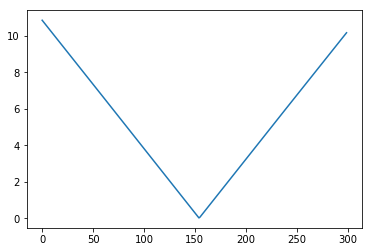

Found best bet0 value -0.227424749164 in run 0.
Minimum Diff in wdir: 0.0143773595572
Using configuration file conf_beta_angle_1_0.py
Using raw data files in path /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/flights/demmin/20170814/flight2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2017-08-14 16:04:25' and '2017-08-14 16:05:25' UTC
Done.
Iterating...
Mean wind dir: 203.0079226605351  4.184755157871107
Mean flight direction: 21.41192252338536
mean height: 2034.7610057123622
5.707972481253647
Using configuration file conf_beta_angle_1_1.py
Using raw data files in path /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/flights/demmin/20170814/flight2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Prepr

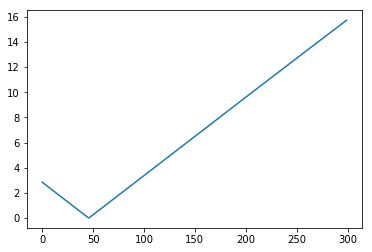

Found best bet0 value -0.769230769231 in run 1.
Minimum Diff in wdir: 0.0143989109733
Using configuration file conf_beta_angle_2_0.py
Using raw data files in path /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/flights/demmin/20170815/flight2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2017-08-15 09:21:00' and '2017-08-15 09:22:00' UTC
Done.
Iterating...
Mean wind dir: 135.58433229507125  5.468483055843154
Mean flight direction: 303.8901333126398
mean height: 242.94653471862856
8.542986652861048
Using configuration file conf_beta_angle_2_1.py
Using raw data files in path /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/flights/demmin/20170815/flight2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Prep

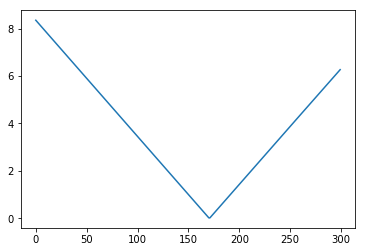

Found best bet0 value -0.142140468227 in run 2.
Minimum Diff in wdir: 0.02332281896
Using configuration file conf_beta_angle_3_0.py
Using raw data files in path /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/flights/demmin/20170815/flight2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2017-08-15 09:43:00' and '2017-08-15 09:44:00' UTC
Done.
Iterating...
Mean wind dir: 139.11713406861006  9.192118958979119
Mean flight direction: 302.7698725479682
mean height: 286.1096822505169
8.473777198437773
Using configuration file conf_beta_angle_3_1.py
Using raw data files in path /home/axel/Dropbox/Dokumente/studium/WeWi/5Loch/flights/demmin/20170815/flight2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preproc

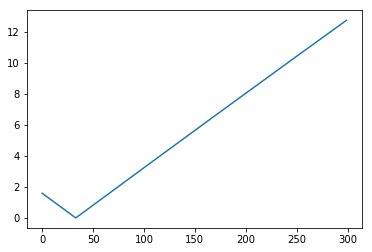

Found best bet0 value -0.834448160535 in run 3.
Minimum Diff in wdir: 0.00293786041817
Using configuration file conf_beta_angle_4_0.py
Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:32:40' and '2018-06-07 18:33:24' UTC
Done.
Iterating...
Mean wind dir: 116.80254329202766  2.82019240287858
Mean flight direction: 284.6026301139169
mean height: 761.9829229087011
6.536695677034245
Using configuration file conf_beta_angle_4_1.py
Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:3

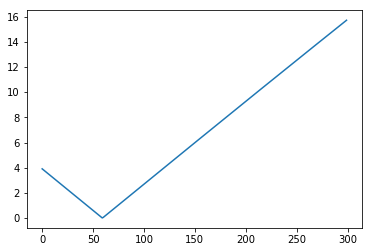

Found best bet0 value -0.704013377926 in run 4.
Minimum Diff in wdir: 0.012643895207
Using configuration file conf_beta_angle_5_0.py
Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:35:00' and '2018-06-07 18:35:45' UTC
Done.
Iterating...
Mean wind dir: 117.68221888000875  3.0262373509366296
Mean flight direction: 281.624594247112
mean height: 760.2832848220711
6.5898886840832995
Using configuration file conf_beta_angle_5_1.py
Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:3

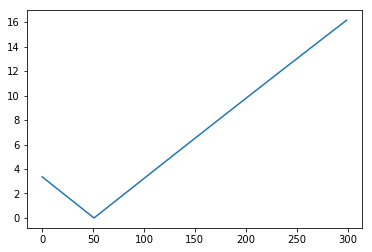

Found best bet0 value -0.744147157191 in run 5.
Minimum Diff in wdir: 0.00461900376408
Using configuration file conf_beta_angle_6_0.py
Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:37:20' and '2018-06-07 18:38:00' UTC
Done.
Iterating...
Mean wind dir: 118.43323996010372  2.133684209480098
Mean flight direction: 282.91513875231794
mean height: 761.1780692342957
6.630339396996114
Using configuration file conf_beta_angle_6_1.py
Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18

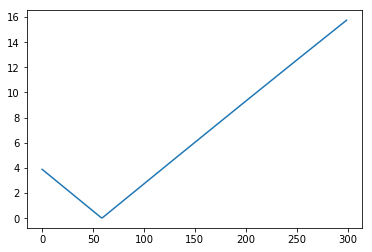

Found best bet0 value -0.704013377926 in run 6.
Minimum Diff in wdir: 0.0237310407222
Using configuration file conf_beta_angle_7_0.py
Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:39:35' and '2018-06-07 18:40:20' UTC
Done.
Iterating...
Mean wind dir: 118.58993241248572  2.672021969719766
Mean flight direction: 283.28038614786664
mean height: 761.2049787918592
6.64394587952386
Using configuration file conf_beta_angle_7_1.py
Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part2/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:4

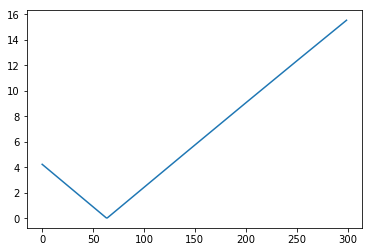

Found best bet0 value -0.678929765886 in run 7.
Minimum Diff in wdir: 0.0329407567447


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

#processing routines
main_dir = '/home/axel/5Loch/python/'
new_conf_dir = '/home/axel/5Loch/processing/configurations/'
new_const_dir = '/home/axel/5Loch/processing/constants/'

#interval

def copy_conf(mn_dir, new_conf_dir, new_conf):
    '''
    Moves a specified configuration file into the python processing directory
    '''
    #copy configuration file into the main python directory (specified above)
    os.system('mv ' + mn_dir + 'conf.py ' + mn_dir + ' conf.py.bak') #backup configuration file
    os.system('cp ' + new_conf_dir + new_conf + ' ' + mn_dir + 'conf.py')
    print('Using configuration file ' + new_conf)
    
    return(None)

def copy_const(mn_dir, new_const_dir, new_const):
    '''
    Moves a specified constant file into the python processing directory
    '''
    os.system('mv ' + mn_dir + 'const.py ' + mn_dir + ' const.py.bak') #backup configuration file
    os.system('cp ' + new_const_dir + new_const + ' ' + mn_dir + 'const.py')
    print('Using constant file ' + new_const)
    
    return(None)

#copy constant file
#copy_const(main_dir, new_conf_dir, 'const_beta_angle.py')

#guessed values
bet0_range = [-1,0.5]
fineness = 300
x_m = np.linspace(bet0_range[0],bet0_range[1],fineness)
out_bet0 = np.zeros(8)

for i in np.arange(0,8): #number of individuel legs
    out = np.zeros((fineness,2)) #clear working output variable
    for j in [0,1]:
        new_conf = 'conf_beta_angle_' + str(i) + '_' + str(j) + '.py'
        copy_conf(main_dir, new_conf_dir, new_conf)
        output_dir = os.getcwd()
        os.chdir(main_dir)
        exec(open('main.py').read())
        os.chdir(output_dir)
        #now the configuration is loaded...lets iterate over all x_m's
        print('Iterating...')
        for k,var in enumerate(x_m):
            bet0_new = var
            data.update(wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0_new, C_alp, C_bet, L, r, simple=False))
            out[k,j] = np.mean(data['wdir'])
            if k == int(fineness/2):
                print('Mean wind dir: ' + str(np.mean(data['wdir'])) + '  ' + str(np.std(data['wdir'])))
                print('Mean flight direction: ' + str(np.mean(data['psi'])/np.pi*180))
                print('mean height: ' + str(np.mean(data['height'])))
        print(np.mean(data['wspd']))
    diff = abs(out[:,1]-out[:,0])
    plt.plot(diff)
    print(x_m,diff)
    plt.show()
    out_bet0[i] = x_m[np.where(diff == np.min(diff))]
    print('Found best bet0 value ' + str(out_bet0[i]) + ' in run ' + str(i) + '.')
    print('Minimum Diff in wdir: ' + str(np.min(diff)))

array([  0.31283781,   0.26366467,   0.21449527,   0.16532964,
         0.11616778,   0.06700971,   0.01785545,   0.03129499,
         0.0804416 ,   0.12958435,   0.17872325,   0.22785827,
         0.2769894 ,   0.32611662,   0.37523992,   0.42435928,
         0.4734747 ,   0.52258616,   0.57169363,   0.62079712,
         0.6698966 ,   0.71899205,   0.76808348,   0.81717085,
         0.86625417,   0.9153334 ,   0.96440855,   1.01347959,
         1.06254651,   1.1116093 ,   1.16066793,   1.20972241,
         1.25877271,   1.30781883,   1.35686074,   1.40589843,
         1.45493189,   1.5039611 ,   1.55298605,   1.60200673,
         1.65102312,   1.70003522,   1.74904299,   1.79804644,
         1.84704554,   1.89604028,   1.94503066,   1.99401665,
         2.04299824,   2.09197542,   2.14094817,   2.18991648,
         2.23888034,   2.28783973,   2.33679464,   2.38574505,
         2.43469096,   2.48363234,   2.53256918,   2.58150148,
         2.63042921,   2.67935237,   2.72827094,   2.77

In [84]:
print(r'Best beta_0 value found: beta_0=' + '{:.4f}'.format(np.mean(out_bet0)) + r'+-' +
      r'{:.2f}'.format(np.std(out_bet0)))

Best beta_0 value found: beta_0=-0.4883+-0.37


In [42]:
def Ck_alp(k):
    
    wind = wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, k, C_bet, L, r, simple=False)
    out = np.std(wind['w'])
    
    return(out)

def t_lag_w(t_lag):
    time_old = np.array(data['time'])
    time_new = time_old + t_lag
    press_new = {}
    for var in ['p_alp', 'p_bet', 'p_spd', 'p_spd_corr', 'p_alt', 'p_alt_corr']:
        press_old = np.array(data[var])
        press_new[var] = np.interp(time_new, time_old, press_old)
    
    wind = wc.wind_out(press_new['p_alt'], press_new['p_alt_corr'], press_new['p_spd'],
                          press_new['p_spd_corr'], press_new['p_alp'], press_new['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, C_alp, C_bet, L, r, simple=False)
    out = np.std(wind['w'])
    
    return(out)

def func_deriv(f,dx=0.01):
    '''
    function derivator (1D)
        
    Input:
        x - float, input value
        
    Output:
        df - function, derived function
    '''
    def df(x):
        '''
        actual function derivation
        '''
        return((f(x + dx) - f(x - dx)) / 2. /dx)
    return(df)


def newton(func,x_range,tries=10,epsilon=0.00001,dx=0.01):
    '''
    Newton iteration function (1D) for retreiving the root
    
    Input:
        func - function, 1D input function
        x_range - list, range of the suspected solution
        tries - int, number of max iterations
        epsilon - float, stop cirterion
        dx - float, discrete derivation step size
        
    Output:
        x_n - float, root of input function within the predefined x-range
    '''
    
    func_p = func_deriv(func)
    x_n = x_range[0] + (x_range[1] - x_range[0]) / 2
    count = 0
    diff = epsilon + 1
    while count < tries and diff >= epsilon:
        x_n_p1 = x_n - func(x_n) / (func_p(x_n) + 1e-32)
        count = count + 1
        diff = abs(x_n_p1 - x_n)
        x_n = x_n_p1
        print('iteration: ' + str(count) + ', parameter: ' + str(x_n))
    if count == tries:
        print('No solution found after ' + str(tries) + ' iterations. Returned None')
        return(None)
    else:
        print('Solution found.')
        return(x_n)


In [62]:
#pitch angle calibration

#first: copy configuration file into python directory and run the main.py
import os

#Processing data

#processing routines
main_dir = '/home/axel/5Loch/python/'

#copy configuration file into the main python directory (specified above)
os.system('mv ' + main_dir + 'conf.py conf.py.bak') #backup configuration file
os.system('cp /home/axel/5Loch/processing/configurations/conf_pitching_maneuver_4.py ' +
          main_dir + 'conf.py')

#copy const file
#os.system('mv ' + main_dir + 'const.py const.py.bak')
#os.system('cp /home/axel/5Loch/processing/constants/const_pitching_maneuver.py ' + 
#         main_dir + 'const.py')

#output directory for plots etc.
output_dir = os.getcwd()

#change to processing directory
os.chdir(main_dir)

#execute to get data
exec(open('main.py').read())

os.chdir(output_dir)

Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part1/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:24:50' and '2018-06-07 18:26:17' UTC
Done.


In [63]:
wind_w_deriv = func_deriv(Ck_alp)
Ck_alp_best = newton(wind_w_deriv,[0.0,0.1])

data.update(wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, Ck_alp_best, C_bet, L, r, simple=False))

print(Ck_alp_best)
print(np.std(data['w']))

iteration: 1, parameter: 0.06637895325981008
iteration: 2, parameter: 0.080313997227247
iteration: 3, parameter: 0.08814749859569296
iteration: 4, parameter: 0.09078975459678112
iteration: 5, parameter: 0.091160234019505
iteration: 6, parameter: 0.09118308199517543
iteration: 7, parameter: 0.09118423287626524
Solution found.
0.09118423287626524
0.2559173626468114


In [86]:
#pitch angle calibration

#first: copy configuration file into python directory and run the main.py
import os

#Processing data

#processing routines
main_dir = '/home/axel/5Loch/python/'

#copy configuration file into the main python directory (specified above)
os.system('mv ' + main_dir + 'conf.py conf.py.bak') #backup configuration file
os.system('cp /home/axel/5Loch/processing/configurations/conf_yawing_maneuver_6.py ' +
          main_dir + 'conf.py')

#copy const file
#os.system('mv ' + main_dir + 'const.py const.py.bak')
#os.system('cp /home/axel/5Loch/processing/constants/const_pitching_maneuver.py ' + 
#         main_dir + 'const.py')

#output directory for plots etc.
output_dir = os.getcwd()

#change to processing directory
os.chdir(main_dir)

#execute to get data
exec(open('main.py').read())

os.chdir(output_dir)

Using raw data files in path /home/axel/5Loch/flights/testflights/20180607/part1/
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading CPT6100 data...
Loading HMT310 data...
Loading USB1608 data...
Loading Novatel data...
Preprocessing data...
Time selected between: '2018-06-07 18:26:47' and '2018-06-07 18:27:55' UTC
Done.


In [87]:
def Ck_bet(k):
    
    wind = wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, C_alp, k, L, r, simple=False)
    
    out = np.std(wind['v'])
    
    return(out)

wind_deriv = func_deriv(Ck_bet)
Ck_bet_best = newton(wind_deriv,[0.,0.09])

data.update(wc.wind_out(data['p_alt'], data['p_alt_corr'], data['p_spd'],
                          data['p_spd_corr'], data['p_alp'], data['p_bet'],
                          data['T'], data['theta'], data['theta_dot'],
                          data['psi'], data['psi_dot'], data['phi'],
                          data['u_p'], data['v_p'], data['w_p'],
                          alp0, bet0, C_alp, Ck_bet_best, L, r, simple=False))

print(Ck_bet_best)
print('Flight direction: {:.1f}'.format(np.mean(data['psi']/np.pi*180)))
print(np.std(data['u']), np.std(data['v']))

iteration: 1, parameter: 0.06402312371442194
iteration: 2, parameter: 0.07424804819844363
iteration: 3, parameter: 0.0729134871482932
iteration: 4, parameter: 0.07312294949086935
iteration: 5, parameter: 0.07310062460385172
iteration: 6, parameter: 0.07310316036143848
Solution found.
0.07310316036143848
Flight direction: 79.9
0.2503326091378803 0.25009834210160753
